In [ ]:
# 📦 ייבוא ספריות
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from google.colab import files, drive

# חיבור Google Drive
drive.mount('/content/drive')

In [8]:
# הצגת סוג הנתונים וכמות הערכים החסרים בכל עמודה
missing_data = df_2024.isnull().sum()  # ספירת ערכים חסרים
data_types = df_2024.dtypes  # סוגי הנתונים

# איחוד המידע למסגרת נתונים אחת לנוחות התצוגה
data_summary = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_data,
    'Percentage Missing': (missing_data / len(df_2024)) * 100
})

# הצגת המידע
data_summary

,Data Type,Missing Values,Percentage Missing
Month,object,0,0.000000
תאריך,object,0,0.000000
סוג פריט,object,0,0.000000
תאור סוג,object,11868,8.196642
מס' פריט,object,0,0.000000
תאור פריט,object,816,0.563571
הזמנה,int64,0,0.000000
כמות,int64,0,0.000000
סכום,float64,0,0.000000
הנחה לפריט,int64,0,0.000000


In [9]:
# Converting the date column to datetime format and extracting useful features
df_2024['תאריך'] = pd.to_datetime(df_2024['תאריך'], dayfirst=True)  # Ensure date format is correct
df_2024['Day_of_Week'] = df_2024['תאריך'].dt.day_name()  # Extract day of the week
df_2024['Month_Name'] = df_2024['תאריך'].dt.month_name()  # Extract month name
df_2024['Week_of_Year'] = df_2024['תאריך'].dt.isocalendar().week  # Week of the year

In [10]:
df_2024

,Month,תאריך,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Day_of_Week,Month_Name,Week_of_Year
0,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636270,1,0.0,0,0.0,Monday,January,1
1,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636327,1,85.9,0,85.9,Monday,January,1
2,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',5,טוליפ 14' [],7636270,1,0.0,0,0.0,Monday,January,1
3,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',92,פפרוני ספיישל בצק דק 14' [],7636281,1,0.0,0,0.0,Monday,January,1
4,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',93,קריביאן בצק דק 14' [],7636289,1,0.0,0,0.0,Monday,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144786,"December, 2024",2025-01-01,13,פיצות מיוחדות 14',20,קלאסית 14' [],7669629,1,102.8,0,102.8,Wednesday,January,1
144787,"December, 2024",2025-01-01,13,פיצות מיוחדות 14',20,קלאסית 14' [],7669630,1,0.0,0,0.0,Wednesday,January,1
144788,"December, 2024",2025-01-01,13,פיצות מיוחדות 14',39,מרגריטה 8' [],7669631,1,34.9,0,34.9,Wednesday,January,1
144789,"December, 2024",2025-01-01,14,NaN,283,היוונית,7669629,1,0.0,0,0.0,Wednesday,January,1


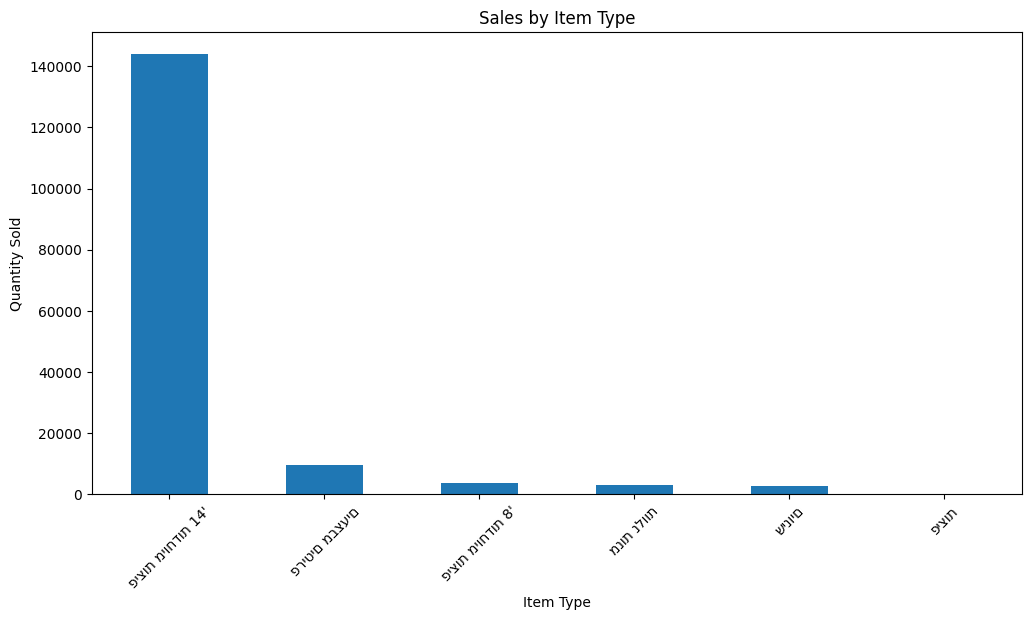

In [12]:
# Grouping by item type and summing quantities sold
item_sales = df_2024.groupby('תאור סוג')['כמות'].sum().sort_values(ascending=False)

# Plotting the top item categories
plt.figure(figsize=(12,6))
item_sales.plot(kind='bar')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

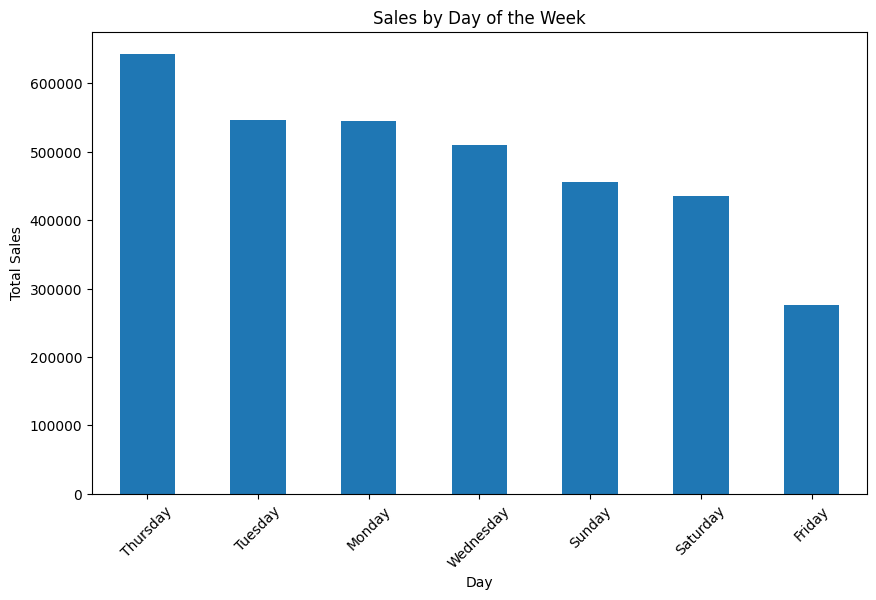

In [13]:
# Grouping by day of the week and summing sales
day_sales = df_2024.groupby('Day_of_Week')['אחרי הנחה'].sum().sort_values(ascending=False)

# Plotting sales by day of the week
plt.figure(figsize=(10,6))
day_sales.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Grouping by 'הזמנה' and aggregating the items ordered in each order
# Combining the item descriptions into a single string for each order
df_grouped = df_2024.groupby('הזמנה').agg({
    'תאריך': 'first',  # Keeping the first date for each order
    'תאור סוג': lambda x: ', '.join(x.dropna().unique()),  # Combining unique item types into a string
    'תאור פריט': lambda x: ', '.join(x.dropna().unique()), # Combining unique item descriptions
    'כמות': 'sum',  # Summing quantities for each order
    'סכום': 'sum',  # Summing the total amount for each order
    'הנחה לפריט': 'sum',  # Summing the total discount
    'אחרי הנחה': 'sum'  # Summing the total amount after discount
}).reset_index()

# Display the grouped data
df_grouped.head()

,הזמנה,תאריך,תאור סוג,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה
0,7636259,2024-01-01,פיצות מיוחדות 14',מרגריטה 8' [],1,30.90,0,30.90
1,7636260,2024-01-01,פיצות מיוחדות 8',"זיתים ירוקים חצי ימין, פאפא קראסט קלאסי 14' []",2,88.85,0,88.85
2,7636261,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים","תירס, תוספת גבינה, עגבניות, ארוחת ילדים, קלאסי...",8,59.00,0,59.00
3,7636262,2024-01-01,פיצות מיוחדות 14',קלאסית 8' [],1,30.90,0,30.90
4,7636263,2024-01-01,פיצות מיוחדות 14',"פיוז טי אפרסק 1.5 ליטר, קלאסית 16' []",2,97.70,0,97.70


In [16]:
# Converting the date column to datetime format and extracting useful features
df_grouped['תאריך'] = pd.to_datetime(df_grouped['תאריך'], dayfirst=True)  # Ensure date format is correct
df_grouped['Day_of_Week'] = df_grouped['תאריך'].dt.day_name()  # Extract day of the week
df_grouped['Month_Name'] = df_grouped['תאריך'].dt.month_name()  # Extract month name
df_grouped['Week_of_Year'] = df_grouped['תאריך'].dt.isocalendar().week  # Week of the year

In [17]:
df_grouped

,הזמנה,תאריך,תאור סוג,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה,Day_of_Week,Month_Name,Week_of_Year
0,7636259,2024-01-01,פיצות מיוחדות 14',מרגריטה 8' [],1,30.90,0,30.90,Monday,January,1
1,7636260,2024-01-01,פיצות מיוחדות 8',"זיתים ירוקים חצי ימין, פאפא קראסט קלאסי 14' []",2,88.85,0,88.85,Monday,January,1
2,7636261,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים","תירס, תוספת גבינה, עגבניות, ארוחת ילדים, קלאסי...",8,59.00,0,59.00,Monday,January,1
3,7636262,2024-01-01,פיצות מיוחדות 14',קלאסית 8' [],1,30.90,0,30.90,Monday,January,1
4,7636263,2024-01-01,פיצות מיוחדות 14',"פיוז טי אפרסק 1.5 ליטר, קלאסית 16' []",2,97.70,0,97.70,Monday,January,1
...,...,...,...,...,...,...,...,...,...,...,...
32741,7669629,2025-01-01,פיצות מיוחדות 14',"רוטב שום פרמזן גדול, ללא משולשים, פיצות מיוחדו...",6,112.70,0,112.70,Wednesday,January,1
32742,7669630,2025-01-01,"פיצות מיוחדות 14', פריטים מבצעים","קוקה קולה 1.5 ליטר, שקית לקוח, פטריות, קלאסית ...",6,85.35,0,85.35,Wednesday,January,1
32743,7669631,2025-01-01,פיצות מיוחדות 14',"ללא משולשים, מרגריטה 8' []",3,34.90,0,34.90,Wednesday,January,1
32744,7669632,2024-12-31,,"קלאסית 14'+ תוס BM, פיצה אישית + תוס XTRA, קל...",45,4013.20,0,4013.20,Tuesday,December,1


In [ ]:
# Defining the correct order for months and days of the week
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Reindexing to ensure all months and days are included, even if data is missing
monthly_weekly_sales = monthly_weekly_sales.reindex(index=month_order, columns=day_order, fill_value=0)
monthly_weekly_sales

In [ ]:
# Reset the index to move months from the index to a column
monthly_weekly_sales = monthly_weekly_sales.reset_index()

# Rename the new column (if needed)
monthly_weekly_sales.rename(columns={'index': 'Month'}, inplace=True)

# Perform one-hot encoding for the 'תאריך' column
monthly_weekly_sales = pd.get_dummies(monthly_weekly_sales, columns=['תאריך'], prefix='', prefix_sep='')

# Display the updated table
monthly_weekly_sales

In [ ]:
# רשימת שמות החודשים לפי סדר
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# שינוי האינדקס לשמות החודשים
monthly_weekly_sales.index = month_order

# בדיקה אם הכל תקין
monthly_weekly_sales # לראות שהתוצאה נכונה

In [ ]:
correlation_matrix = monthly_weekly_sales.corr()

In [ ]:
# Define the columns for days of the week (Sunday to Saturday)
day_columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.loc[['January', 'February', 'March', 'April', 'May', 'June',
                            'July', 'August', 'September', 'October', 'November', 'December'], day_columns],  # Ensure correct slicing
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    cbar=True
)

# Add titles and labels
plt.title('Correlation Between Months and Days of the Week', fontsize=14)
plt.xlabel('Days of the Week', fontsize=12)
plt.ylabel('Months', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()